<a href="https://colab.research.google.com/github/Stepeech/NNLearn/blob/main/%D0%9F%D0%A04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout()

[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

### Задание 1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки. Визуализируйте несколько изображений из датасета. Произведите нормализацию данных. 


*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





In [1]:
from tensorflow import keras

(trainX, trainY), (testX, testY) = keras.datasets.cifar100.load_data()
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255

trainY = keras.utils.to_categorical(trainY, 100)
testY = keras.utils.to_categorical(testY, 100)

print('Train: X = ', trainX.shape)
print('Train: Y = ', trainY.shape)
print('Test: X = ', testX.shape)
print('Test: Y = ', testY.shape)

169001437/169001437 [==============================] - 6s 0us/step
Train: X =  (50000, 32, 32, 3)
Train: Y =  (50000, 100)
Test: X =  (10000, 32, 32, 3)
Test: Y =  (10000, 100)


### Задание 2. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout(). 

Имя данной модели: model_1

In [2]:
from keras.layers import Activation, BatchNormalization, Dropout, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential

model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(64, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dense(256))
model_1.add(Activation('relu'))
model_1.add(Dense(100))
model_1.add(Activation('softmax'))

model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                        

Обучите созданную модель

In [6]:
batch_size = 250
epochs = 12
model_1_history = model_1.fit(trainX, trainY, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(testX, testY))

Epoch 1/12
200/200 [==============================] - 4s 20ms/step - loss: 0.1198 - accuracy: 0.9613 - val_loss: 6.8809 - val_accuracy: 0.3787
Epoch 2/12
200/200 [==============================] - 4s 18ms/step - loss: 0.1039 - accuracy: 0.9662 - val_loss: 7.2353 - val_accuracy: 0.3717
Epoch 3/12
200/200 [==============================] - 4s 20ms/step - loss: 0.1171 - accuracy: 0.9627 - val_loss: 7.2854 - val_accuracy: 0.3772
Epoch 4/12
200/200 [==============================] - 4s 19ms/step - loss: 0.0963 - accuracy: 0.9685 - val_loss: 7.3133 - val_accuracy: 0.3678
Epoch 5/12
200/200 [==============================] - 4s 18ms/step - loss: 0.1196 - accuracy: 0.9629 - val_loss: 7.2195 - val_accuracy: 0.3691
Epoch 6/12
200/200 [==============================] - 3s 17ms/step - loss: 0.1123 - accuracy: 0.9640 - val_loss: 7.4924 - val_accuracy: 0.3683
Epoch 7/12
200/200 [==============================] - 4s 19ms/step - loss: 0.1061 - accuracy: 0.9654 - val_loss: 7.2829 - val_accuracy: 0.3702

### Задание 3. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization(). 

Имя данной модели: model_2

In [5]:
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))

model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dense(256))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(Dense(100))
model_2.add(Activation('softmax'))

model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_8 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                  

Обучите созданную модель

In [7]:
batch_size = 200
epochs = 12
model_2_history = model_2.fit(trainX, trainY, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(testX, testY))

Epoch 1/12
250/250 [==============================] - 10s 21ms/step - loss: 3.3739 - accuracy: 0.2045 - val_loss: 5.4158 - val_accuracy: 0.0269
Epoch 2/12
250/250 [==============================] - 4s 17ms/step - loss: 2.4268 - accuracy: 0.3780 - val_loss: 3.2797 - val_accuracy: 0.2332
Epoch 3/12
250/250 [==============================] - 4s 17ms/step - loss: 1.9283 - accuracy: 0.4907 - val_loss: 2.2829 - val_accuracy: 0.4145
Epoch 4/12
250/250 [==============================] - 4s 18ms/step - loss: 1.5069 - accuracy: 0.5888 - val_loss: 2.3065 - val_accuracy: 0.4243
Epoch 5/12
250/250 [==============================] - 4s 17ms/step - loss: 1.0691 - accuracy: 0.7050 - val_loss: 2.4696 - val_accuracy: 0.4247
Epoch 6/12
250/250 [==============================] - 5s 19ms/step - loss: 0.6328 - accuracy: 0.8272 - val_loss: 2.6844 - val_accuracy: 0.4128
Epoch 7/12
250/250 [==============================] - 5s 19ms/step - loss: 0.3058 - accuracy: 0.9257 - val_loss: 2.9684 - val_accuracy: 0.409

### Задание 4. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout(). 

Имя данной модели: model_3

In [8]:
model_3 = Sequential()
model_3.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dense(256))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(100))
model_3.add(Activation('softmax'))

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_14 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_15 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                      

Обучите созданную модель

In [9]:
batch_size = 200
epochs = 12
model_3_history = model_3.fit(trainX, trainY, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(testX, testY))

Epoch 1/12
250/250 [==============================] - 8s 22ms/step - loss: 4.2994 - accuracy: 0.0416 - val_loss: 3.8324 - val_accuracy: 0.1102
Epoch 2/12
250/250 [==============================] - 5s 19ms/step - loss: 3.7266 - accuracy: 0.1221 - val_loss: 3.4041 - val_accuracy: 0.1952
Epoch 3/12
250/250 [==============================] - 5s 19ms/step - loss: 3.3727 - accuracy: 0.1856 - val_loss: 3.0588 - val_accuracy: 0.2521
Epoch 4/12
250/250 [==============================] - 5s 19ms/step - loss: 3.1211 - accuracy: 0.2344 - val_loss: 2.8624 - val_accuracy: 0.2908
Epoch 5/12
250/250 [==============================] - 5s 18ms/step - loss: 2.9349 - accuracy: 0.2703 - val_loss: 2.7051 - val_accuracy: 0.3174
Epoch 6/12
250/250 [==============================] - 5s 20ms/step - loss: 2.7788 - accuracy: 0.3033 - val_loss: 2.6332 - val_accuracy: 0.3343
Epoch 7/12
250/250 [==============================] - 5s 19ms/step - loss: 2.6442 - accuracy: 0.3308 - val_loss: 2.5296 - val_accuracy: 0.3574

### Задание 5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

In [10]:
model_4 = Sequential()
model_4.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model_4.add(Activation('relu'))
model_4.add(Conv2D(32, (3, 3)))
model_4.add(Activation('relu'))

model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(64, (3, 3), padding='same'))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64, (3, 3)))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Flatten())

model_4.add(Dense(512))
model_4.add(Activation('relu'))
model_4.add(Dense(256))
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(100))
model_4.add(Activation('softmax'))

model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_21 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_22 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                  

Обучите созданную модель

In [11]:
batch_size = 500
epochs = 12
model_4_history = model_4.fit(trainX, trainY, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(testX, testY))
batch_size = 200
epochs = 24
model_41_history = model_4.fit(trainX, trainY, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(testX, testY))

Epoch 1/12
100/100 [==============================] - 15s 62ms/step - loss: 4.3895 - accuracy: 0.0471 - val_loss: 4.7514 - val_accuracy: 0.0150
Epoch 2/12
100/100 [==============================] - 6s 57ms/step - loss: 3.8362 - accuracy: 0.1201 - val_loss: 4.6959 - val_accuracy: 0.0174
Epoch 3/12
100/100 [==============================] - 5s 54ms/step - loss: 3.4711 - accuracy: 0.1755 - val_loss: 4.5838 - val_accuracy: 0.0454
Epoch 4/12
100/100 [==============================] - 6s 61ms/step - loss: 3.1767 - accuracy: 0.2255 - val_loss: 4.0682 - val_accuracy: 0.1028
Epoch 5/12
100/100 [==============================] - 5s 53ms/step - loss: 2.9443 - accuracy: 0.2718 - val_loss: 3.5115 - val_accuracy: 0.1852
Epoch 6/12
100/100 [==============================] - 5s 52ms/step - loss: 2.7328 - accuracy: 0.3113 - val_loss: 2.7153 - val_accuracy: 0.3154
Epoch 7/12
100/100 [==============================] - 6s 56ms/step - loss: 2.5643 - accuracy: 0.3458 - val_loss: 2.6206 - val_accuracy: 0.341

### Задание 5. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель

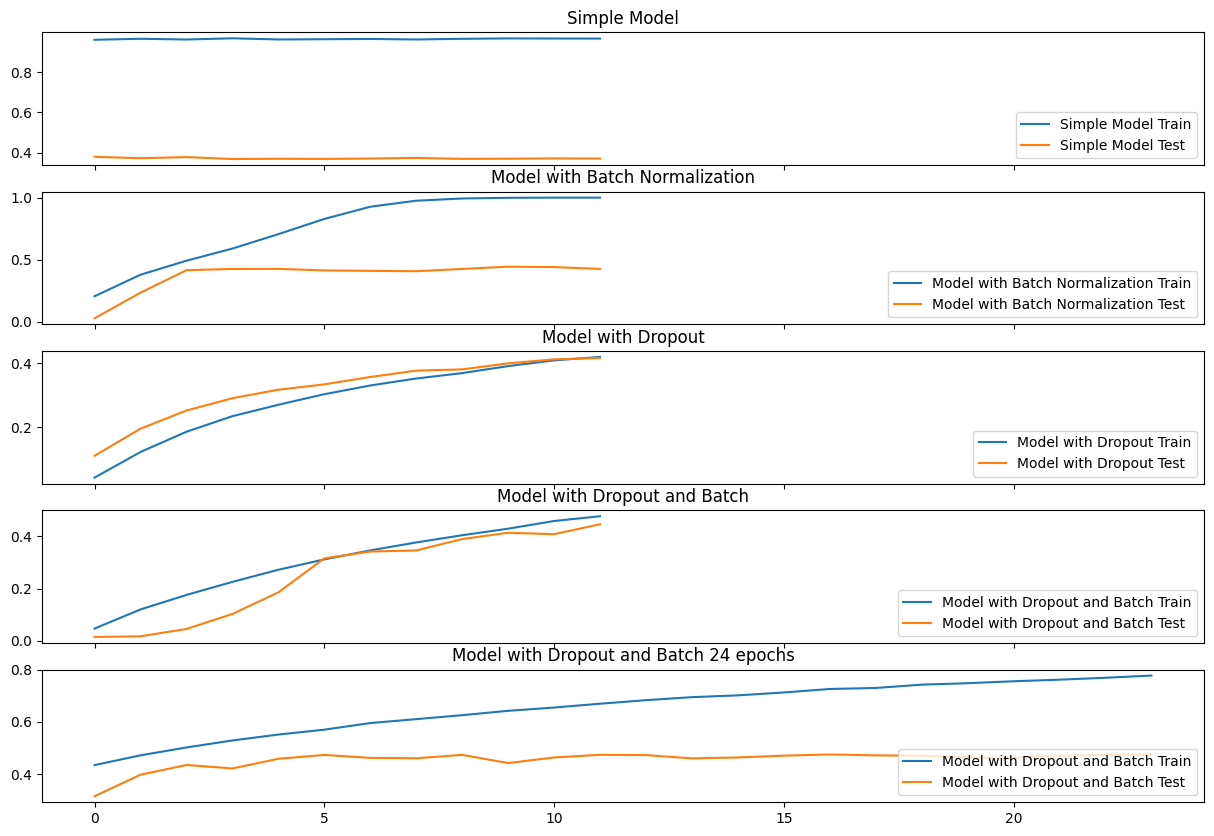

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, (model1Plt, model2Plt, model3Plt, model4Plt, model41Plt) = plt.subplots(5, sharex=True)

fig.set_figwidth(15)
fig.set_figheight(10)

model1Plt.set_title("Simple Model")
model1Plt.plot(model_1_history.history['accuracy'])
model1Plt.plot(model_1_history.history['val_accuracy'])
model1Plt.legend(['Simple Model Train', 'Simple Model Test'], loc="lower right")

model2Plt.set_title("Model with Batch Normalization")
model2Plt.plot(model_2_history.history['accuracy'])
model2Plt.plot(model_2_history.history['val_accuracy'])
model2Plt.legend(['Model with Batch Normalization Train', 'Model with Batch Normalization Test'], loc="lower right")

model3Plt.set_title("Model with Dropout")
model3Plt.plot(model_3_history.history['accuracy'])
model3Plt.plot(model_3_history.history['val_accuracy'])
model3Plt.legend(['Model with Dropout Train', 'Model with Dropout Test'], loc="lower right")

model4Plt.set_title("Model with Dropout and Batch")
model4Plt.plot(model_4_history.history['accuracy'])
model4Plt.plot(model_4_history.history['val_accuracy'])
_ = model4Plt.legend(['Model with Dropout and Batch Train', 'Model with Dropout and Batch Test'], loc="lower right")

model41Plt.set_title("Model with Dropout and Batch 24 epochs")
model41Plt.plot(model_41_history.history['accuracy'])
model41Plt.plot(model_41_history.history['val_accuracy'])
_ = model41Plt.legend(['Model with Dropout and Batch Train', 'Model with Dropout and Batch Test'], loc="lower right")


#### Ваши выводы

Анализ графиков моделей показывает, что нормализация батчами мало влияет на обучение модели и итоговую точность. С другой стороны, использование Dropout или комбинации Dropout и нормализации батчами значительно повышает эффективность модели.

#### Ваш итог

Самая точная модель, достигшая точности 47,51%, использовала нормализацию батчами и Dropout и была обучена на 25 эпохах